Starting time: 22:19:12
Starting first of 100 iterations ...
Est. total 11.0 seconds, finish 22:19:23 after 99 iters at 0.11 sec/iter
Est. total 17.0 seconds, finish 22:19:29 after 68 iters at 0.17 sec/iter
Actual ending time: 22:19:29


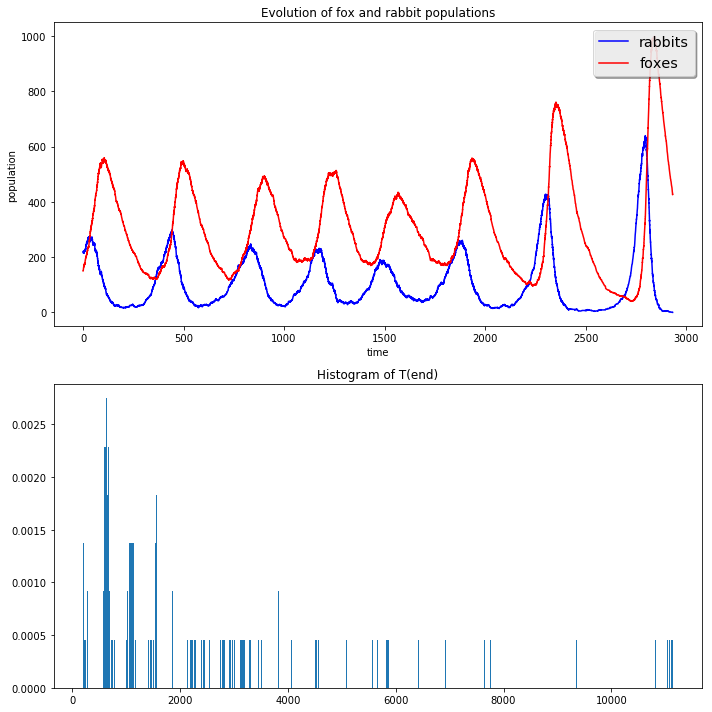

In [19]:
import numpy as np

def fox_rabbit():
    a = 0.03; d = 0.01; c = 0.0001;
    N =[]; M =[]; T = [];
    N.append(220); M.append(150); T.append(0)
    i = 0
    done = False
    while(done == False ):
        r1 = a* N[i]
        r2 = d * M[i]
        r3 = c * M[i] * N[i]
        r12 = r1 + r2
        r123 = r1 + r2 + r3
        deltaW = -(1 / r123) * np.log(np.random.uniform(0,1))
        rr = r123 * np.random.uniform(0,1)    
        z1  = z2 =  z3 = 0
        if rr < r1: z1 = 1
        elif r1 <= rr < r12: z2 = 1
        else: z3 = 1 
        
        N.append(N[i] + z1 - z3)
        M.append(M[i] + z3 - z2)
        T.append(T[i] + deltaW)
        
        i = i + 1
        if N[i]* M[i] < 1e-10 or i > 100000:
            done = True
    return N, M, T

import matplotlib.pyplot as plt
import time
import when_will_it_end as wwie 


def simulation(num):

    fig, axs = plt.subplots(2,1, figsize =(10,10))
    T_end = []
    
    print("Starting time: " + wwie.format_time(time.time()))
    lpm = wwie.LoopProgressMonitor( n = num_iter )
    
    for i in range(num):
        lpm()
        N, M, T = fox_rabbit()
        T_end.append(T[-1])
        
    print('Actual ending time: ' + wwie.format_time(time.time()))  
    
    axs[0].plot(T,N, 'b-', label = 'rabbits')
    axs[0].plot(T,M, 'r-', label = 'foxes') 
    axs[0].set(xlabel = 'time', ylabel= 'population',title = 'Evolution of fox and rabbit populations')
    legend = axs[0].legend(loc ='upper right', shadow = True, fontsize = 'x-large')
    
    axs[1].hist(T_end, bins = 500, normed = 1)
    axs[1].set_title('Histogram of T(end)')
    
    fig.tight_layout()
    plt.show()

num_iter = 100
simulation(num_iter)

        
        
                